In [1]:
import numpy as np
from scipy import stats

# Function to perform a Z-test
def z_test(sample_data, population_mean, population_std):
    sample_mean = np.mean(sample_data)
    sample_size = len(sample_data)
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    return z_score, p_value

# Example usage
data = np.random.normal(loc=50, scale=10, size=100)
z, p = z_test(data, population_mean=52, population_std=10)
print("Z-score:", z)
print("P-value:", p)


Z-score: -2.2816039969512474
P-value: 0.022512730532293412


In [2]:
import numpy as np
from scipy import stats

np.random.seed(0)
data = np.random.normal(loc=100, scale=15, size=50)
z_score = (np.mean(data) - 105) / (15 / np.sqrt(len(data)))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
print("Simulated Z-score:", z_score)
print("P-value:", p_value)


Simulated Z-score: -1.3631184578427709
P-value: 0.1728451804900102


In [4]:
def one_sample_z_test():
    data = np.random.normal(100, 15, 50)
    return z_test(data, population_mean=105, population_std=15)

z, p = one_sample_z_test()
print("One-Sample Z-score:", z)
print("P-value:", p)


One-Sample Z-score: -0.5430473531566862
P-value: 0.5870971994180554


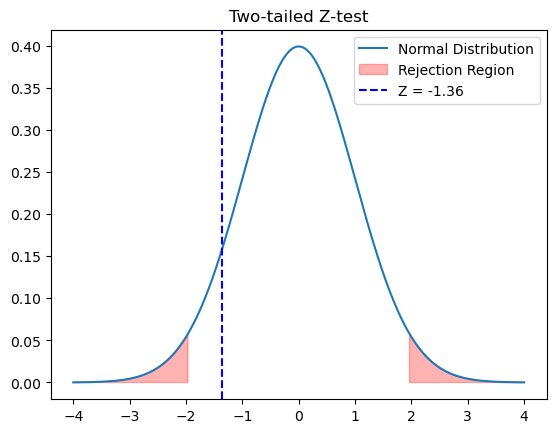

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

def visualize_two_tailed_z_test(z_score, alpha=0.05):
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x)
    critical = norm.ppf(1 - alpha / 2)

    plt.plot(x, y, label='Normal Distribution')
    plt.fill_between(x, 0, y, where=(x < -critical) | (x > critical), color='red', alpha=0.3, label='Rejection Region')
    plt.axvline(z_score, color='blue', linestyle='--', label=f'Z = {z_score:.2f}')
    plt.title("Two-tailed Z-test")
    plt.legend()
    plt.show()

visualize_two_tailed_z_test(z_score)


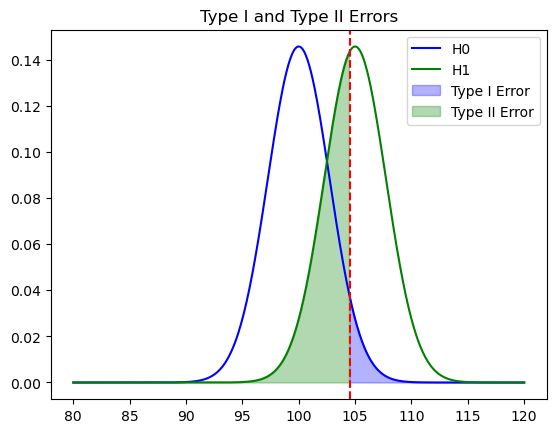

In [6]:
def visualize_type1_type2(mu0=100, mu1=105, sigma=15, n=30, alpha=0.05):
    se = sigma / np.sqrt(n)
    x = np.linspace(80, 120, 500)
    y0 = stats.norm.pdf(x, mu0, se)
    y1 = stats.norm.pdf(x, mu1, se)
    z_critical = stats.norm.ppf(1 - alpha)

    plt.plot(x, y0, label="H0", color='blue')
    plt.plot(x, y1, label="H1", color='green')
    plt.axvline(mu0 + z_critical * se, linestyle='--', color='red')
    plt.fill_between(x, 0, y0, where=(x > mu0 + z_critical * se), alpha=0.3, label='Type I Error', color='blue')
    plt.fill_between(x, 0, y1, where=(x < mu0 + z_critical * se), alpha=0.3, label='Type II Error', color='green')
    plt.legend()
    plt.title("Type I and Type II Errors")
    plt.show()

visualize_type1_type2()


In [7]:
from scipy.stats import ttest_ind

group1 = np.random.normal(70, 10, 30)
group2 = np.random.normal(75, 10, 30)

t_stat, p_value = ttest_ind(group1, group2)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -1.8355993411887663
P-value: 0.0715452370297841


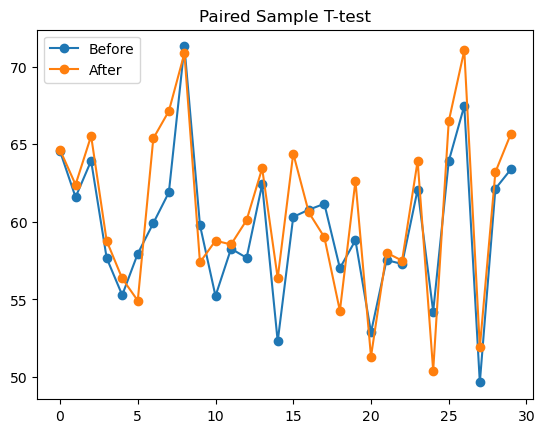

Paired T-statistic: -2.4342673572152727
P-value: 0.021311450479752195


In [8]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

before = np.random.normal(60, 5, 30)
after = before + np.random.normal(2, 3, 30)

t_stat, p_value = ttest_rel(before, after)

plt.plot(before, label="Before", marker='o')
plt.plot(after, label="After", marker='o')
plt.legend()
plt.title("Paired Sample T-test")
plt.show()

print("Paired T-statistic:", t_stat)
print("P-value:", p_value)


In [9]:
sample = np.random.normal(100, 10, 25)
pop_mean = 105

# Z-test
z_score, z_p = z_test(sample, pop_mean, 10)

# T-test
t_stat, t_p = stats.ttest_1samp(sample, pop_mean)

print("Z-test: ", z_score, z_p)
print("T-test: ", t_stat, t_p)


Z-test:  -1.6707833814800352 0.09476447219859163
T-test:  -1.35463891091811 0.18814884359890435


In [10]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)
    margin = se * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin, mean + margin

data = np.random.normal(100, 15, 50)
ci = confidence_interval(data)
print("Confidence Interval:", ci)


Confidence Interval: (93.36014684585314, 101.51282415503755)


In [11]:
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = stats.sem(data)
    margin = se * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin, mean + margin

data = np.random.normal(100, 15, 50)
ci = confidence_interval(data)
print("Confidence Interval:", ci)


Confidence Interval: (92.42012075239843, 99.83801343464533)


In [12]:
import numpy as np
from scipy.stats import t

def margin_of_error(data, confidence=0.95):
    sample_size = len(data)
    sample_mean = np.mean(data)
    se = np.std(data, ddof=1) / np.sqrt(sample_size)
    critical_value = t.ppf((1 + confidence) / 2, df=sample_size - 1)
    margin = critical_value * se
    return margin

data = np.random.normal(100, 15, 30)
print("Margin of Error:", margin_of_error(data))


Margin of Error: 5.571298812457224


In [13]:
def bayes_theorem(prior_A, prob_B_given_A, prob_B):
    return (prob_B_given_A * prior_A) / prob_B

# Example
P_A = 0.01  # Disease prevalence
P_B_given_A = 0.99  # True positive rate
P_B = 0.05  # Overall positive test rate

P_A_given_B = bayes_theorem(P_A, P_B_given_A, P_B)
print("Posterior Probability (P(A|B)):", P_A_given_B)


Posterior Probability (P(A|B)): 0.198


In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

data = pd.DataFrame([[10, 20], [20, 40]])
chi2_stat, p, dof, expected = chi2_contingency(data)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p)


Chi-square Statistic: 0.0
P-value: 1.0


In [15]:
observed = np.array([[30, 10], [20, 40]])
chi2_stat, p, dof, expected = chi2_contingency(observed)
print("Expected Frequencies:\n", expected)


Expected Frequencies:
 [[20. 20.]
 [30. 30.]]


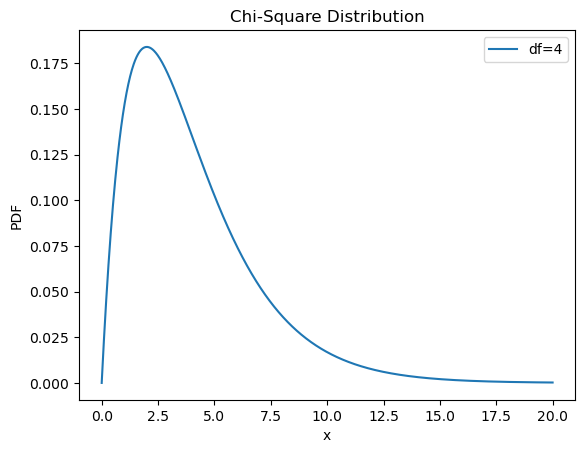

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import chi2

df = 4
x = np.linspace(0, 20, 1000)
y = chi2.pdf(x, df)

plt.plot(x, y, label=f'df={df}')
plt.title('Chi-Square Distribution')
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.show()


In [19]:
group1 = np.random.normal(50, 5, 30)
group2 = np.random.normal(55, 5, 30)
group3 = np.random.normal(60, 5, 30)

f_stat, p_value = f_oneway(group1, group2, group3)
print("ANOVA F-statistic:", f_stat)
print("P-value:", p_value)


NameError: name 'f_oneway' is not defined

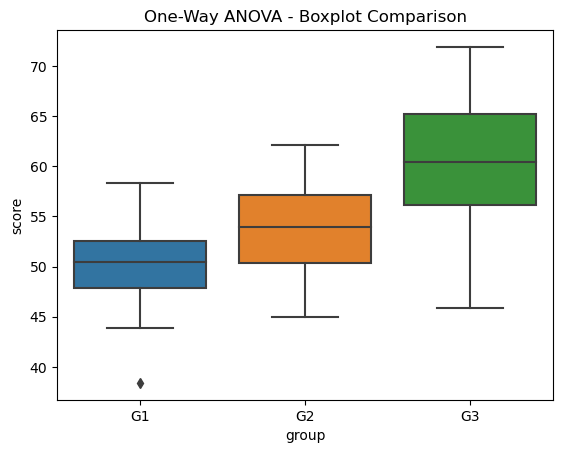

In [20]:
import seaborn as sns

df = pd.DataFrame({
    'score': np.concatenate([group1, group2, group3]),
    'group': ['G1']*30 + ['G2']*30 + ['G3']*30
})
sns.boxplot(x='group', y='score', data=df)
plt.title('One-Way ANOVA - Boxplot Comparison')
plt.show()


In [21]:
from scipy.stats import shapiro, levene

def check_anova_assumptions(*groups):
    print("Shapiro Test (Normality):")
    for i, group in enumerate(groups):
        stat, p = shapiro(group)
        print(f"Group {i+1} -> p = {p:.4f}")
    
    print("\nLevene’s Test (Equal Variances):")
    stat, p = levene(*groups)
    print(f"p = {p:.4f}")

check_anova_assumptions(group1, group2, group3)


Shapiro Test (Normality):
Group 1 -> p = 0.7357
Group 2 -> p = 0.4432
Group 3 -> p = 0.8781

Levene’s Test (Equal Variances):
p = 0.1102


                    sum_sq    df         F    PR(>F)
factor1           1.382096   1.0  1.497851  0.226127
factor2           0.173513   1.0  0.188045  0.666215
factor1:factor2   0.152613   1.0  0.165395  0.685787
Residual         51.672276  56.0       NaN       NaN


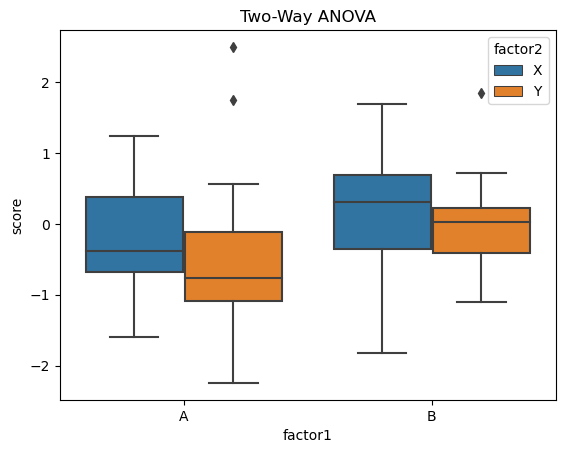

In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Simulate data
df = pd.DataFrame({
    'score': np.random.randn(60),
    'factor1': ['A']*30 + ['B']*30,
    'factor2': ['X']*15 + ['Y']*15 + ['X']*15 + ['Y']*15
})

model = ols('score ~ factor1 + factor2 + factor1:factor2', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

sns.boxplot(x='factor1', y='score', hue='factor2', data=df)
plt.title("Two-Way ANOVA")
plt.show()


In [29]:
from scipy.stats import f
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f  # <-- This line is crucial for F-test and F-distribution
import pandas as pd


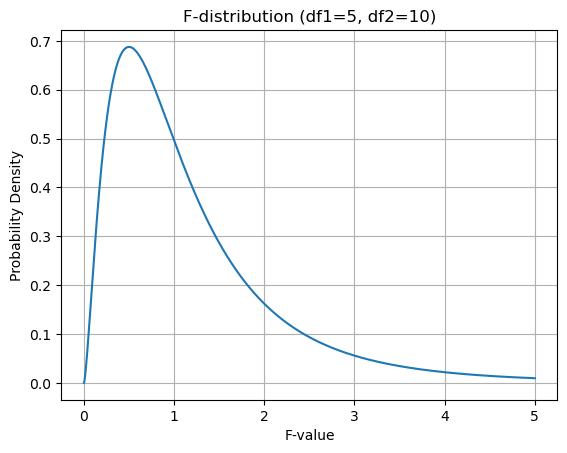

In [30]:
x = np.linspace(0, 5, 1000)
y = f.pdf(x, dfn=5, dfd=10)

plt.plot(x, y)
plt.title("F-distribution (df1=5, df2=10)")
plt.xlabel("F-value")
plt.ylabel("Probability Density")
plt.grid()
plt.show()


In [31]:
sample = np.random.normal(50, 10, 40)
t_stat, p = stats.ttest_1samp(sample, popmean=55)
print("T-statistic:", t_stat)
print("P-value:", p)


T-statistic: -4.596023341182948
P-value: 4.439795736179449e-05


In [32]:
sample = np.random.normal(100, 15, 30)
sample_var = np.var(sample, ddof=1)
n = len(sample)
sigma_sq = 225  # Hypothesized variance (15^2)

chi2_stat = (n - 1) * sample_var / sigma_sq
p = 1 - chi2.cdf(chi2_stat, df=n - 1)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p)


Chi-square Statistic: 30.60926966047044
P-value: 0.38407185139647215


In [33]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([40, 30])
nobs = np.array([100, 100])
z_stat, p_val = proportions_ztest(count, nobs)
print("Z-statistic:", z_stat)
print("P-value:", p_val)


Z-statistic: 1.4824986333222028
P-value: 0.1382076669740257


F-statistic: 0.3631077230850009
P-value: 0.9999995798033187


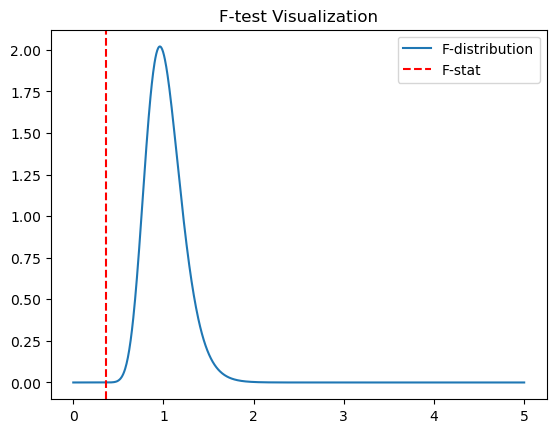

In [34]:
data1 = np.random.normal(80, 8, 100)
data2 = np.random.normal(75, 12, 100)

f_stat = np.var(data1, ddof=1) / np.var(data2, ddof=1)
df1, df2 = len(data1) - 1, len(data2) - 1
p_val = 1 - f.cdf(f_stat, df1, df2)

print("F-statistic:", f_stat)
print("P-value:", p_val)

x = np.linspace(0, 5, 1000)
plt.plot(x, f.pdf(x, df1, df2), label='F-distribution')
plt.axvline(f_stat, color='red', linestyle='--', label='F-stat')
plt.legend()
plt.title("F-test Visualization")
plt.show()


In [35]:
observed = np.random.randint(15, 35, size=5)
expected = np.full(5, np.mean(observed))

chi2_stat, p = stats.chisquare(observed, f_exp=expected)
print("Chi-square Statistic:", chi2_stat)
print("P-value:", p)


Chi-square Statistic: 5.6793893129771
P-value: 0.22440522762576182
